<a href="https://colab.research.google.com/github/israbalushi/isr19f19182/blob/main/data_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataTrain = pd.read_csv('diamonds_data.csv')
dataTrain.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
type(dataTrain)

pandas.core.frame.DataFrame

In [4]:
dataTrain.shape

(50000, 10)

In [5]:
dataTrain.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
dataTrain = dataTrain.dropna()

In [7]:
dataTrain.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:
dataTrain.shape

(50000, 10)

In [9]:
dataTrain.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [10]:
plt.figure(figsize=(10,6))
corr = dataTrain.corr()

<Figure size 1000x600 with 0 Axes>

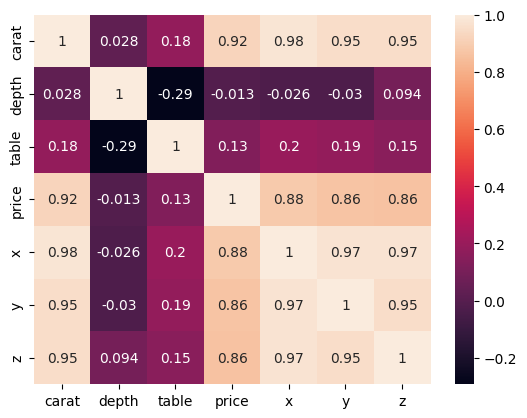

In [11]:
sns.heatmap(corr,annot=True)
plt.show()

In [12]:
dataTrain.describe()

,carat,depth,table,price,x,y,z
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.799444,61.753006,57.457830,3944.805440,5.734403,5.737956,3.541056
std,0.475173,1.431088,2.232092,3997.938105,1.123077,1.145579,0.707065
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2410.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5351.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [13]:
dataTrain.loc[dataTrain['price'] == 1, 'price'] = 500
dataTrain.describe()

,carat,depth,table,price,x,y,z
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.799444,61.753006,57.457830,3944.805440,5.734403,5.737956,3.541056
std,0.475173,1.431088,2.232092,3997.938105,1.123077,1.145579,0.707065
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2410.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5351.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


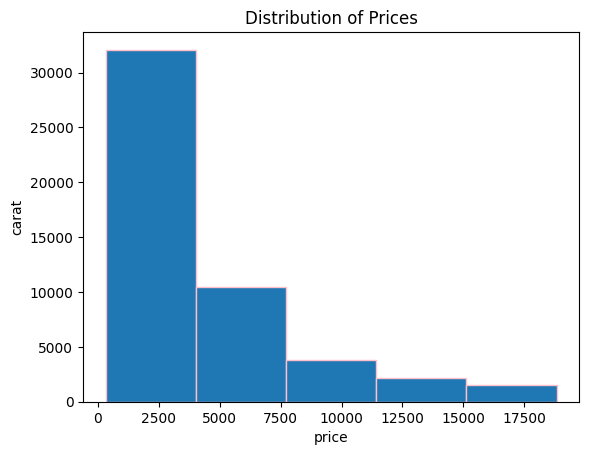

In [14]:
dataTrain['price'].plot(kind = 'hist', bins = 5, edgecolor='Pink')   # 5 bins are used
plt.xlabel('price')
plt.ylabel('carat')
plt.title('Distribution of Prices')
plt.show()

In [15]:
dataTrain.describe(include = 'object')

,cut,color,clarity
count,50000,50000,50000
unique,5,7,8
top,Ideal,G,SI1
freq,19938,10452,12115


<Axes: xlabel='carat', ylabel='price'>

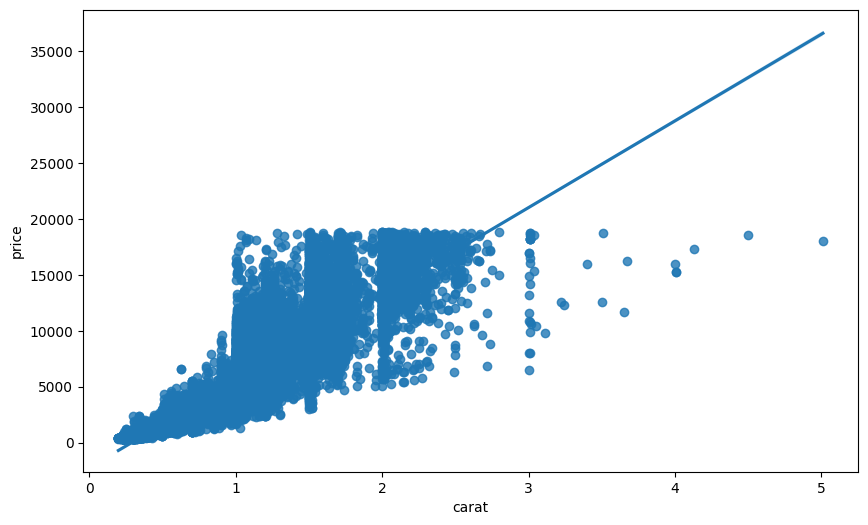

In [16]:
plt.figure(figsize=(10,6))
sns.regplot(x="carat", y="price", data=dataTrain)

In [17]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['carat'], dataTrain['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.9218037353151016  with a P-value of P = 0.0


<Axes: xlabel='depth', ylabel='price'>

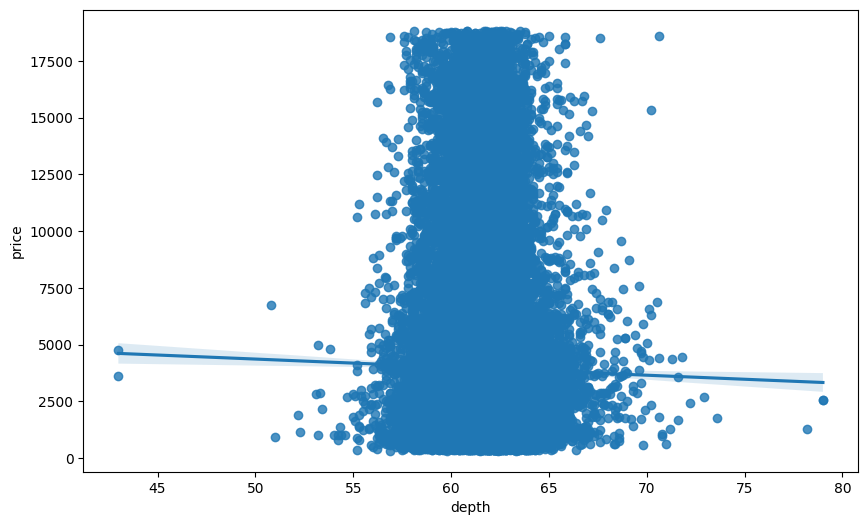

In [18]:
plt.figure(figsize=(10,6))
sns.regplot(x="depth", y="price", data=dataTrain)

In [19]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['depth'], dataTrain['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.012730592135305417  with a P-value of P = 0.004417620294468447


<Axes: xlabel='table', ylabel='price'>

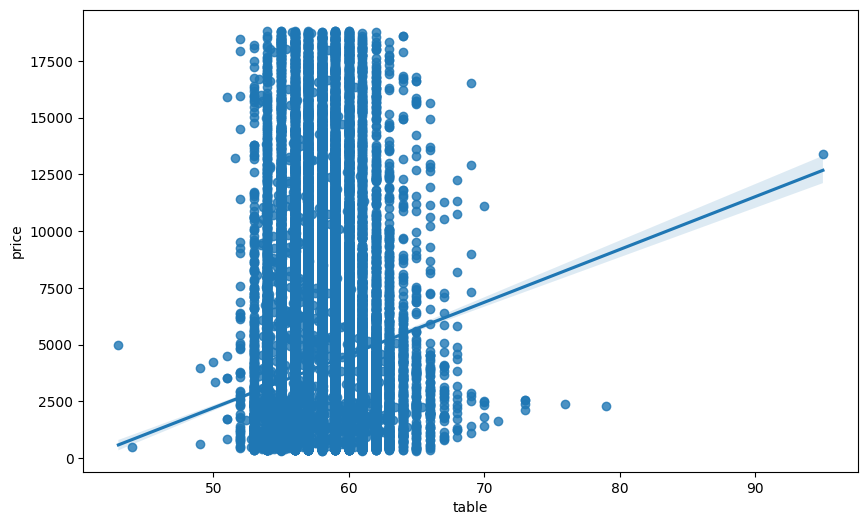

In [20]:
plt.figure(figsize=(10,6))
sns.regplot(x="table", y="price", data=dataTrain)

In [21]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['table'], dataTrain['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.12984776440367513  with a P-value of P = 6.686214941406356e-187


<Axes: xlabel='x', ylabel='price'>

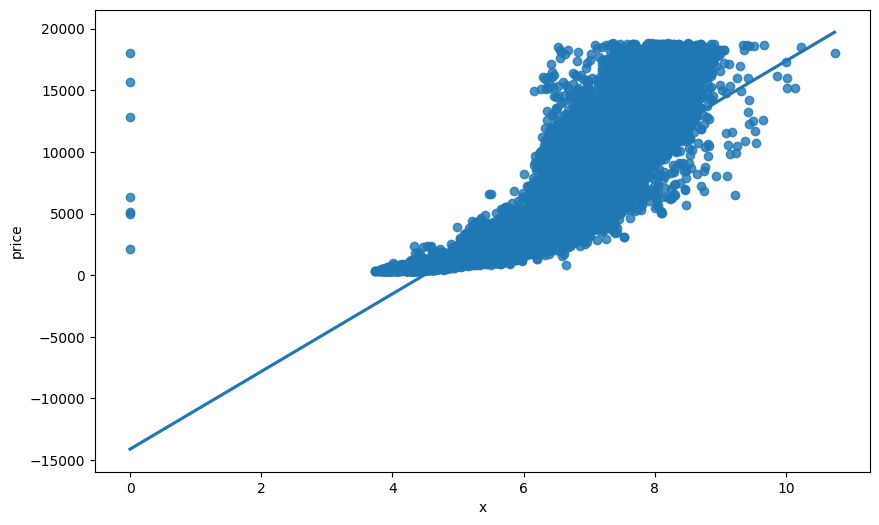

In [22]:
plt.figure(figsize=(10,6))
sns.regplot(x="x", y="price", data=dataTrain)

In [23]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['x'], dataTrain['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8849193801270541  with a P-value of P = 0.0


<Axes: xlabel='y', ylabel='price'>

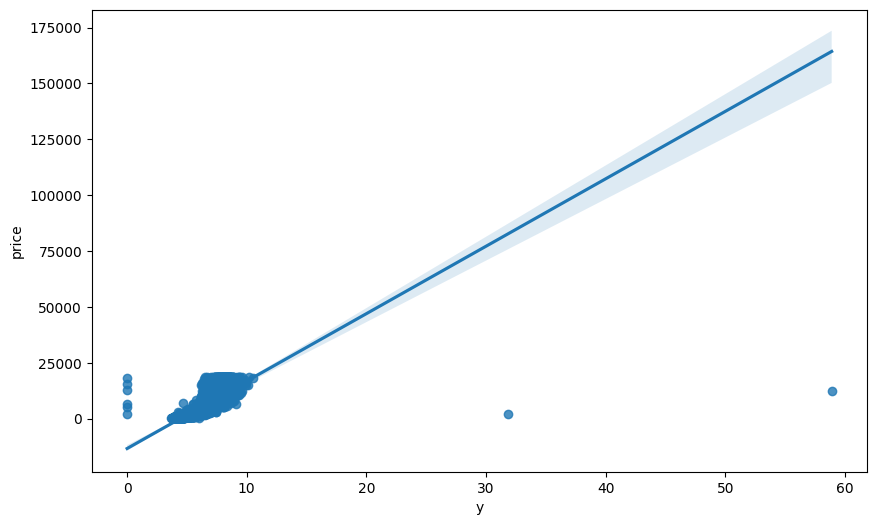

In [24]:
plt.figure(figsize=(10,6))
sns.regplot(x="y", y="price", data=dataTrain)

In [25]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['y'], dataTrain['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8643927333814753  with a P-value of P = 0.0


<Axes: xlabel='z', ylabel='price'>

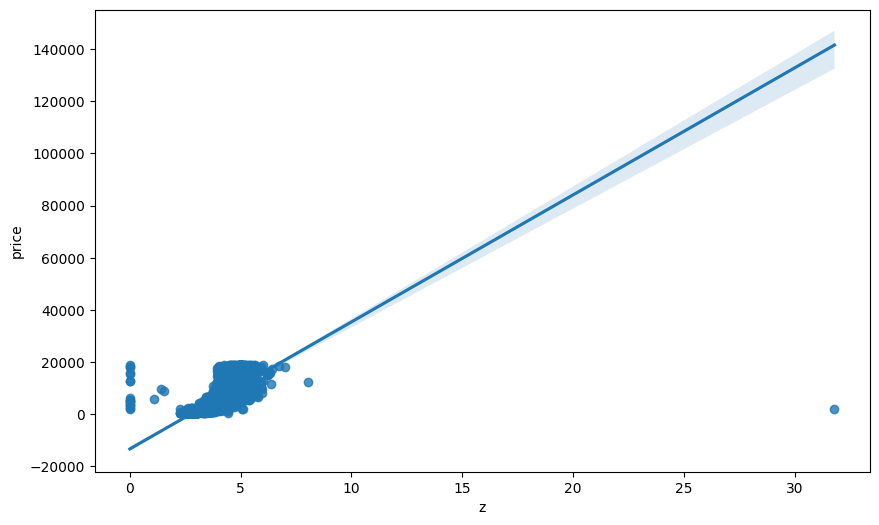

In [26]:
plt.figure(figsize=(10,6))
sns.regplot(x="z", y="price", data=dataTrain)

In [27]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['z'], dataTrain['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8609627646870683  with a P-value of P = 0.0


<Axes: xlabel='carat', ylabel='price'>

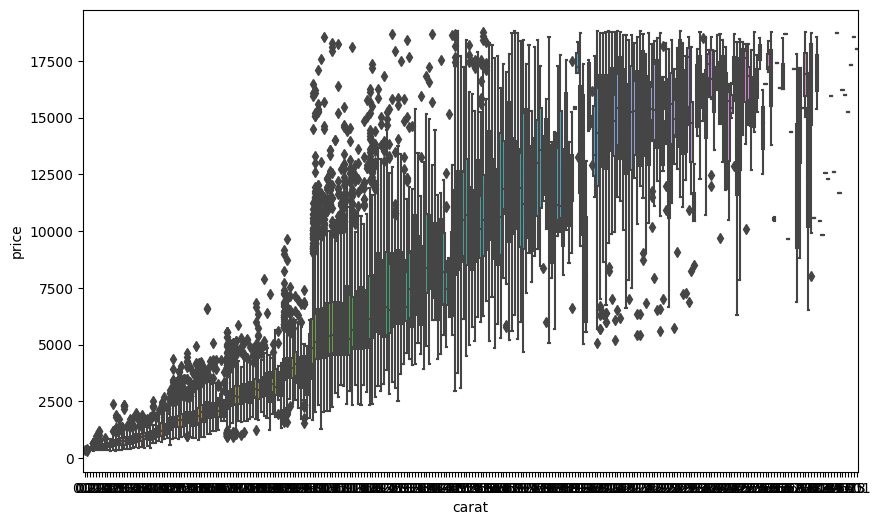

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(x="carat", y="price", data=dataTrain)

<Axes: xlabel='cut', ylabel='price'>

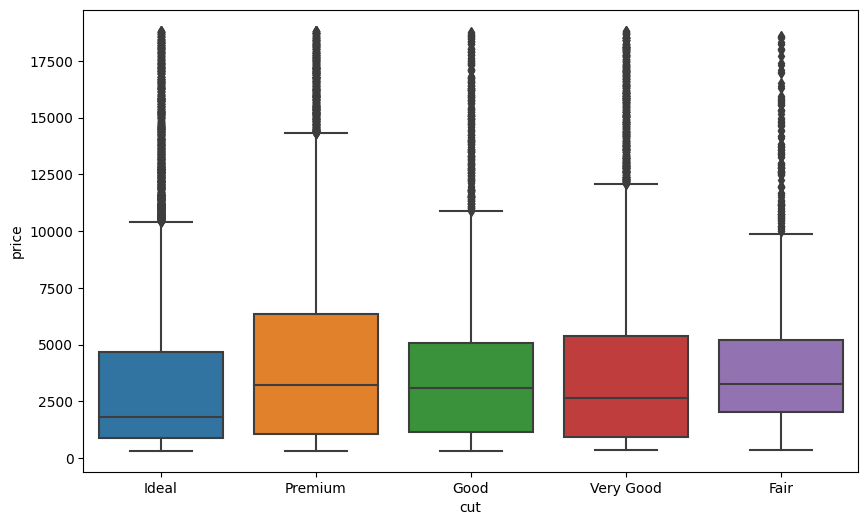

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(x="cut", y="price", data=dataTrain)

<Axes: xlabel='color', ylabel='price'>

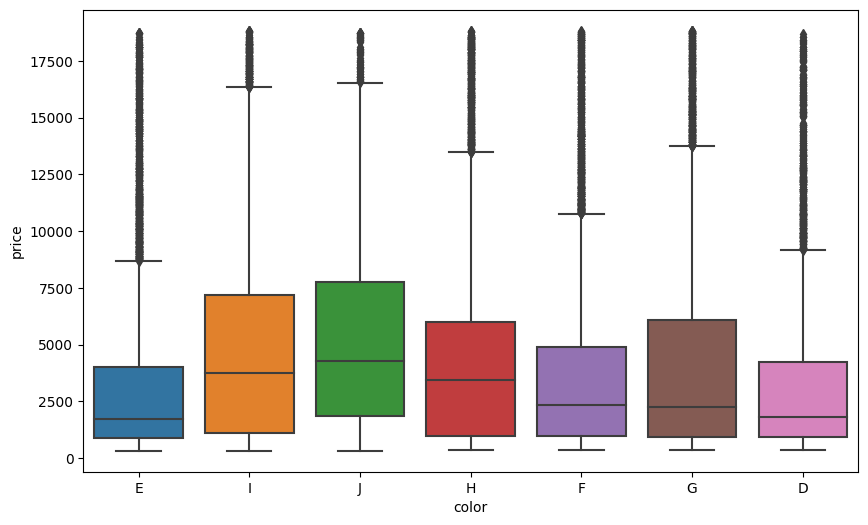

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(x="color", y="price", data=dataTrain)

<Axes: xlabel='clarity', ylabel='price'>

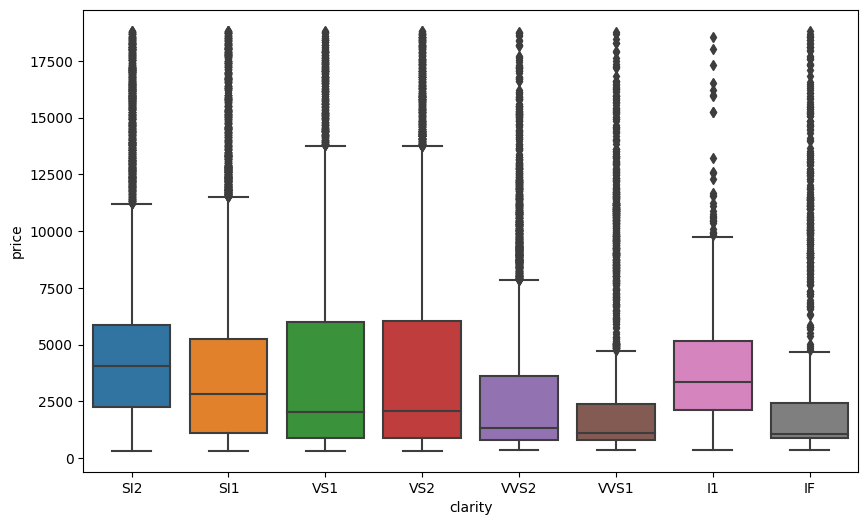

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(x="clarity", y="price", data=dataTrain)

<Axes: xlabel='depth', ylabel='price'>

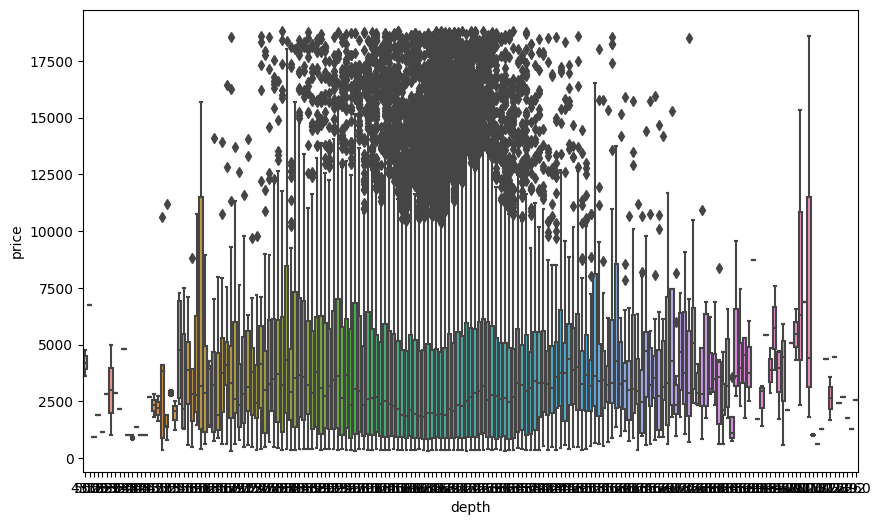

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(x="depth", y="price", data=dataTrain)

<Axes: xlabel='table', ylabel='price'>

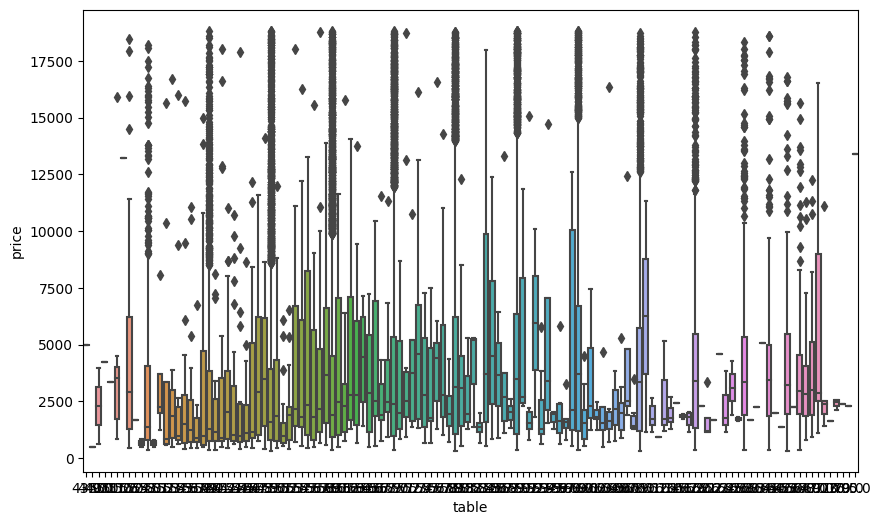

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(x="table", y="price", data=dataTrain)

<Axes: xlabel='x', ylabel='price'>

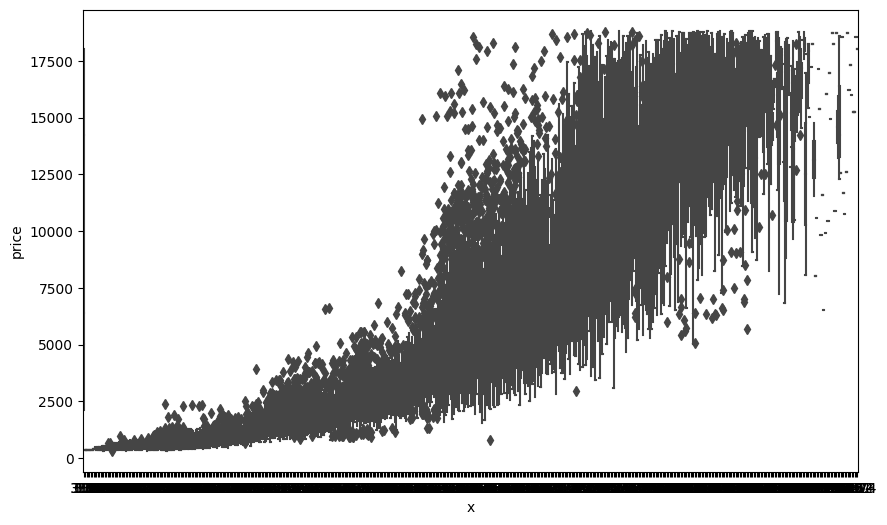

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(x="x", y="price", data=dataTrain)

<Axes: xlabel='y', ylabel='price'>

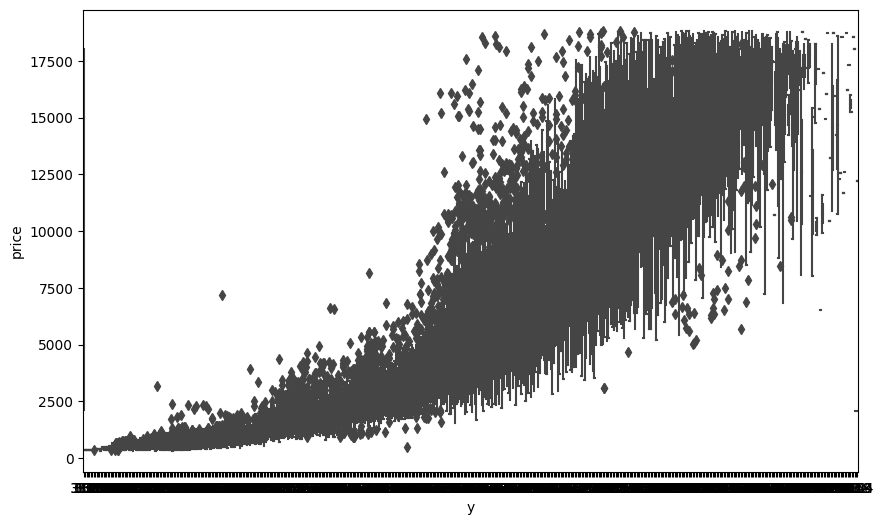

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(x="y", y="price", data=dataTrain)

<Axes: xlabel='z', ylabel='price'>

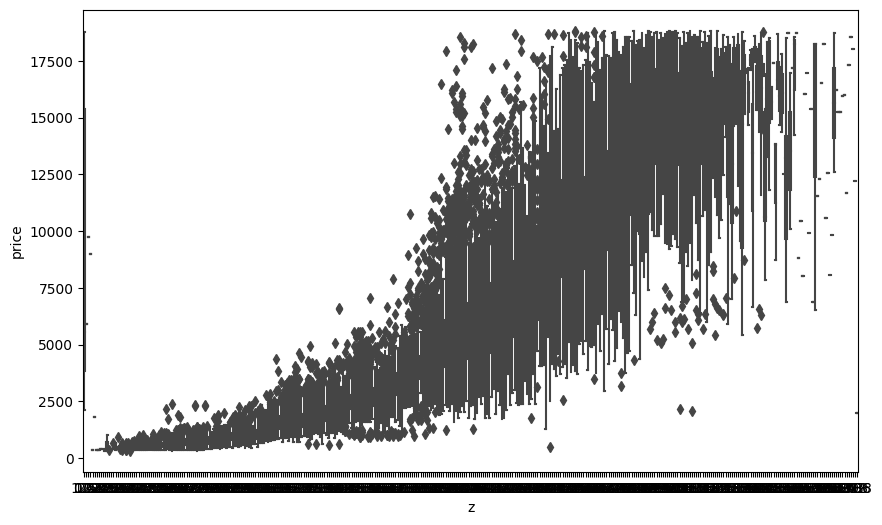

In [36]:
plt.figure(figsize=(10,6))
sns.boxplot(x="z", y="price", data=dataTrain)

In [37]:
dataTrain.drop(['cut',	'color', 'clarity', 'table'], axis = 1, inplace = True)

In [38]:
dataTrain.shape

(50000, 6)

In [39]:
print(dataTrain.columns)

Index(['carat', 'depth', 'price', 'x', 'y', 'z'], dtype='object')


In [40]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
dataTrain.price = labelencoder.fit_transform(dataTrain.price)
dataTrain.x = labelencoder.fit_transform(dataTrain.x)
dataTrain.y = labelencoder.fit_transform(dataTrain.y)
dataTrain.z = labelencoder.fit_transform(dataTrain.z)

In [41]:
dataTrain.head(10)

,carat,depth,price,x,y,z
0,0.23,61.5,0,20,26,22
1,0.21,59.8,0,14,12,10
2,0.23,56.9,1,30,35,10
3,0.29,62.4,2,45,51,42
4,0.31,63.3,3,59,63,54
5,0.24,62.8,4,19,24,27
6,0.24,62.3,4,20,26,26
7,0.26,61.9,5,32,39,32
8,0.22,65.1,5,12,7,28
9,0.23,59.4,6,25,33,18


In [42]:
import scipy.stats as stats
dataTrain= stats.zscore(dataTrain)

In [43]:
dataTrain

,carat,depth,price,x,y,z
0,-1.198405,-0.176795,-1.036775,-1.593013,-1.579346,-1.605200
1,-1.240495,-1.364714,-1.036775,-1.646571,-1.705213,-1.778555
2,-1.198405,-3.391165,-1.036436,-1.503751,-1.498431,-1.778555
3,-1.072134,0.452104,-1.036097,-1.369857,-1.354583,-1.316274
4,-1.030043,1.081003,-1.035758,-1.244890,-1.246697,-1.142919
...,...,...,...,...,...,...
49995,-0.167191,-0.665938,-0.260418,0.013711,0.020966,-0.059447
49996,-0.167191,0.941247,-0.260418,-0.039846,0.011976,0.099462
49997,-0.209281,0.731615,-0.260418,-0.066625,-0.050958,0.027230
49998,0.127442,-0.526183,-0.260418,0.370761,0.344625,0.287264


In [44]:
from sklearn.model_selection import train_test_split
x = dataTrain.drop(['price'], axis=1)
y = dataTrain['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [45]:
dataTrain.shape

(50000, 6)

In [46]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(35000, 5)
(15000, 5)
(35000,)
(15000,)


In [47]:
x_train.head()

,carat,depth,x,y,z
24222,3.052721,-0.316550,2.486281,2.412444,-1.923018
18525,-1.008998,-0.106917,-1.227037,-1.201744,-1.215150
36729,-0.966908,0.102716,-1.119922,-1.138811,-1.114026
15349,1.579559,0.591859,1.450837,1.405506,1.515198
41632,-0.609140,-1.085204,-0.495085,-0.446541,-0.579514


In [48]:
y_train.head()

24222    2.440734
18525   -1.010343
36729   -0.787026
15349    0.914452
41632   -0.633856
Name: price, dtype: float64

In [49]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model_mlr = model.fit(x_train,y_train)

In [50]:
y_pred1 = model_mlr.predict(x_test)

In [51]:
y_pred1[0]

0.6677483888884379

In [52]:
mse1 = mean_squared_error(y_test, y_pred1)
print('The mean square error for Multiple Linear Regression: ', mse1)

The mean square error for Multiple Linear Regression:  0.11581965585303006


In [53]:
mae1= mean_absolute_error(y_test, y_pred1)
print('The mean absolute error for Multiple Linear Regression: ',mae1)

The mean absolute error for Multiple Linear Regression:  0.22907426974551703


In [55]:
rf = RandomForestRegressor()
model_rf = rf.fit(x_train,y_train)

In [56]:
y_pred2 = model_rf.predict(x_test)

In [57]:
mae2= mean_absolute_error(y_test, y_pred2)
print('The mean square error of price and predicted value is: ', mae2)

The mean square error of price and predicted value is:  0.1978208791589701


In [58]:
mae2= mean_absolute_error(y_test, y_pred2)
print('The mean absolute error of price and predicted value is: ', mae2)

The mean absolute error of price and predicted value is:  0.1978208791589701


In [59]:
LassoModel = Lasso()
model_lm = LassoModel.fit(x_train,y_train)

In [60]:
y_pred3 = model_lm.predict(x_test)

In [61]:
mae3= mean_absolute_error(y_test, y_pred3)
print('The mean absolute error of price and predicted value is: ', mae3)

The mean absolute error of price and predicted value is:  0.8258292192383417


In [62]:
mse3 = mean_squared_error(y_test, y_pred3)
print('The mean square error of price and predicted value is: ', mse3)

The mean square error of price and predicted value is:  1.0059977522750343


In [63]:
scores = [('MLR', mae1),
          ('Random Forest', mae2),
          ('LASSO', mae3)
         ]

In [64]:
mae = pd.DataFrame(data = scores, columns=['Model', 'MAE Score'])
mae

,Model,MAE Score
0,MLR,0.229074
1,Random Forest,0.197821
2,LASSO,0.825829


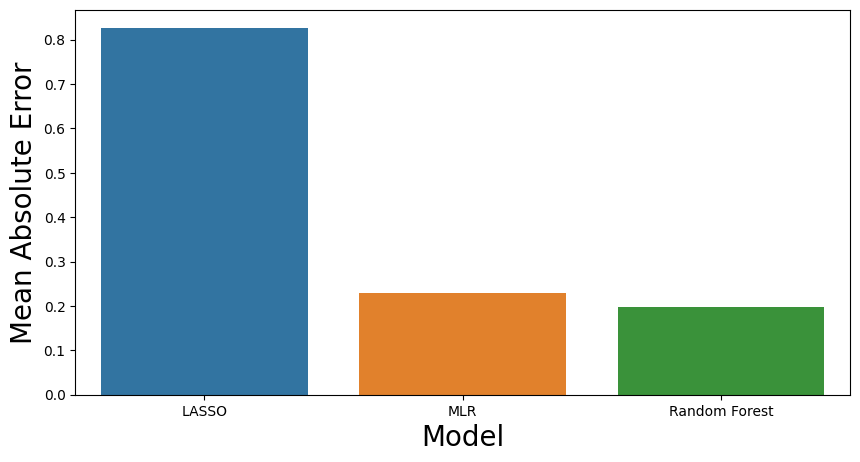

In [65]:
mae.sort_values(by=(['MAE Score']), ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(10,5))
sns.barplot(x = mae['Model'], y=mae['MAE Score'], ax = axe)
axe.set_xlabel('Model', size=20)
axe.set_ylabel('Mean Absolute Error', size=20)

plt.show()